![alt text](Buddy.png "Title")

In [9]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
db_file = 'yelp_reviews.db'

## Helper functions
import os
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [47]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

### Where are Yelp's businesses located?

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



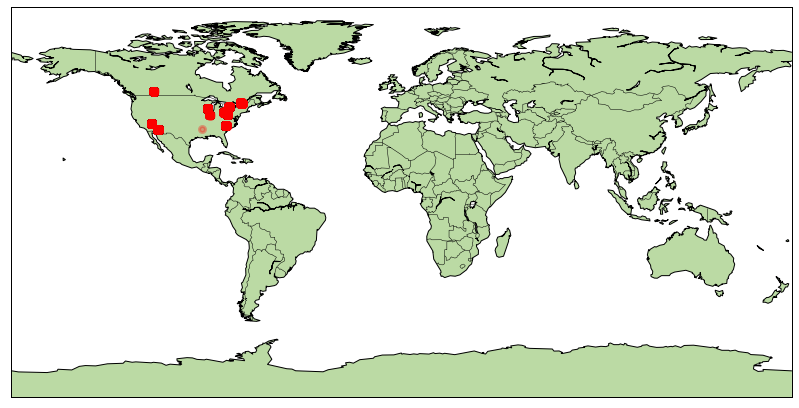

In [8]:
conn = create_connection(db_file)
locationDetails = pd.read_sql("""SELECT latitude,longitude
FROM business""", conn)
fig = plt.figure(figsize=(14, 8), edgecolor='w')

m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180,
            llcrnrlat = -90, urcrnrlat= 90,resolution='c',
           lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='#bbdaa4',lake_color='#FFFFFF')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(locationDetails['latitude'].tolist(),locationDetails['longitude'].tolist())
print(mloc)
m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

### Top 10 cities based on business mentioned in Yelp

In [46]:
conn = create_connection(db_file)
top10Cities = pd.read_sql("""SELECT Count(*), city
FROM business
GROUP BY city
ORDER BY Count(*) DESC
LIMIT 10""", conn)


In [44]:
top10Cities.index = top10Cities.city

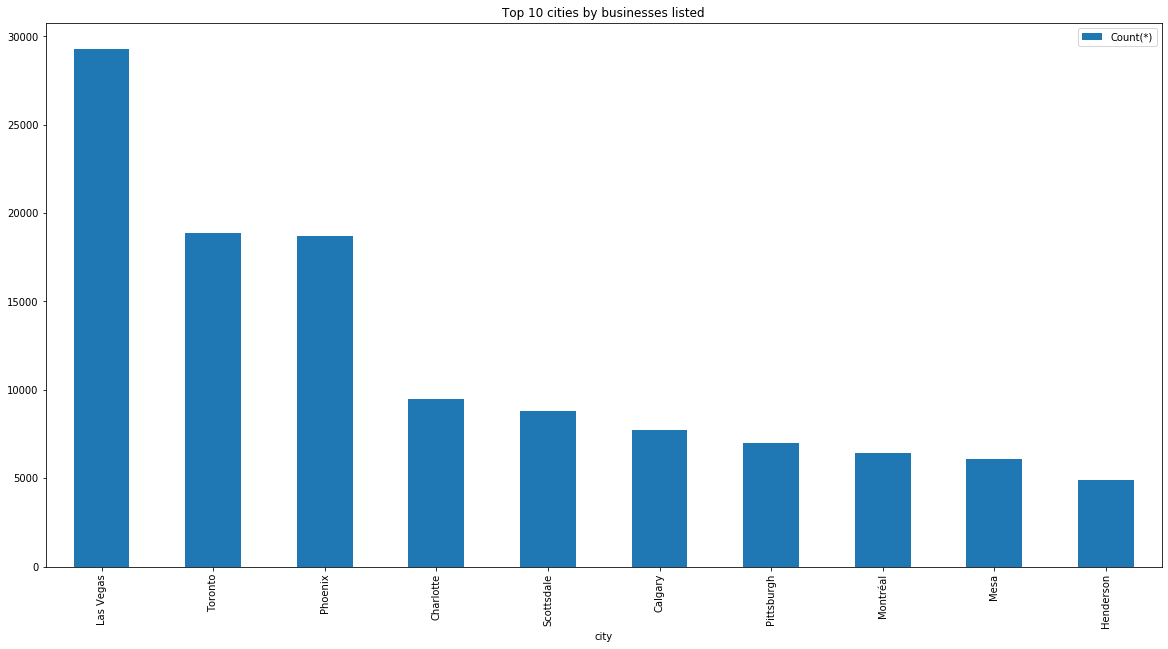

In [45]:
top10Cities.plot(kind="bar", figsize=(20,10))
plt.title('Top 10 cities by businesses listed')

plt.show()

### What kind of business run well in Las Vegas????

In [10]:
conn = create_connection(db_file)
LasVegasBusiness = pd.read_sql("""SELECT * 
FROM business
WHERE city="Las Vegas" 
LIMIT 10""", conn)

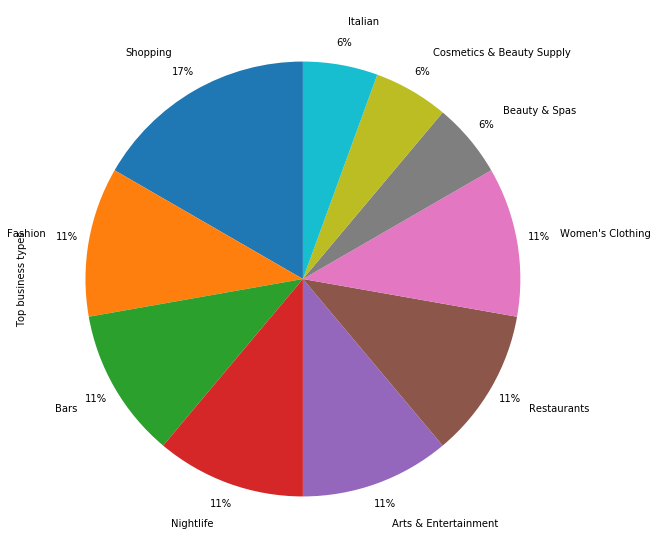

In [25]:
cat_data = LasVegasBusiness
num_cat=10
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        x=x.strip()
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']
x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

### DIstibution of Stars across all business types

In [65]:
conn = create_connection(db_file)
starsCount = pd.read_sql("""SELECT count(*) as noOfBusiness,stars
FROM business
GROUP BY stars""", conn)

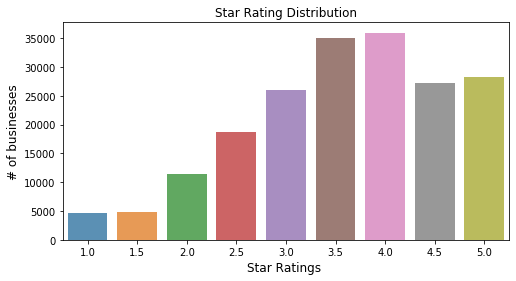

In [72]:
x=starsCount.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.stars, x.noOfBusiness, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

plt.show()

### Top 10 Reviewed business of all time

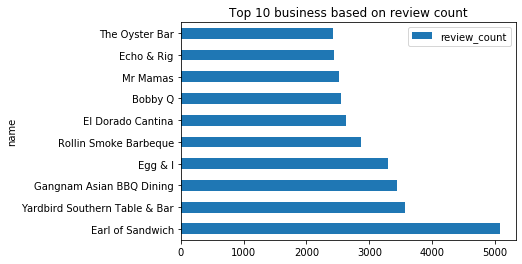

In [30]:
conn = create_connection(db_file)
top10ReviewedBusiness = pd.read_sql("""SELECT business_id,name,review_count,stars,categories FROM business
WHERE stars>4
ORDER BY review_count DESC
LIMIT 10""",conn)
#print(top10ReviewedBusiness)
top10ReviewedBusiness.plot(kind='barh',x='name',y='review_count')
plt.title('Top 10 business based on review count')
plt.show()

### What categories do the top business belong to???

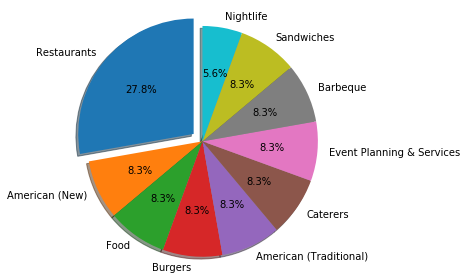

In [39]:
# Categories of top business
num_cat =10 # to show top 10 catrgories
top_business = 30 # choose categories of top 30 businesses
cat_data = top10ReviewedBusiness
#print(cat_data.categories)
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        x=x.strip()
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
#series = pd.Series(x_val, index=labels, name='Top business types')
#series.plot.pie(figsize=(10, 10),startangle=90,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

explode = (0.1,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(x_val, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=1)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Bottom most businesses on Yelp

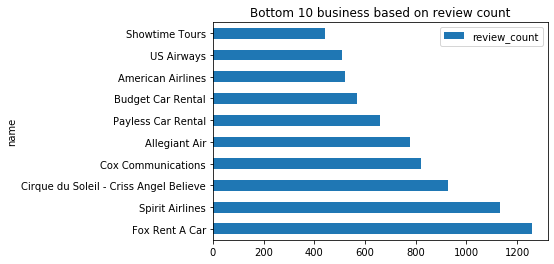

In [42]:
conn = create_connection(db_file)
bottom10ReviewedBusiness = pd.read_sql("""SELECT business_id,name,review_count,stars,categories FROM business
WHERE stars<2
ORDER BY review_count DESC
LIMIT 10""",conn)
#print(bottom10ReviewedBusiness)
bottom10ReviewedBusiness.plot(kind='barh',x='name',y='review_count')
plt.title('Bottom 10 business based on review count')
plt.show()


### What Categories do these bottom businesses belong to???

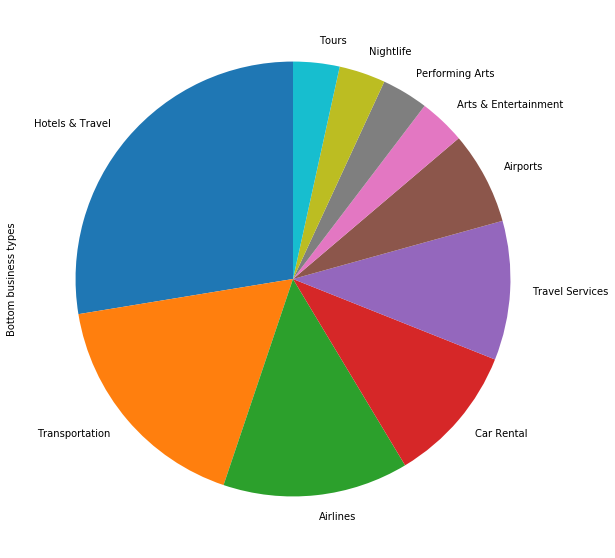

In [43]:
# Categories of bottom business
num_cat =10 # to show top 10 catrgories
bottom_business = 30 # choose categories of top 30 businesses
cat_data = bottom10ReviewedBusiness
#print(cat_data.categories)
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        x=x.strip()
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Bottom business types')
series.plot.pie(figsize=(10, 10),startangle=90)